<a href="https://colab.research.google.com/github/atikhasan007/Scikit-learn/blob/main/statistical%20analysis/Statistical%20Learning%20Tutorial%20for%20Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import plotting
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [120]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [121]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [122]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Drop columns**

In [124]:
df = df.drop(['id','Unnamed: 32'] , axis=1)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [126]:
#quick look to data
df.head()
df1 = df.copy()

In [127]:
df.shape

(569, 31)

In [128]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

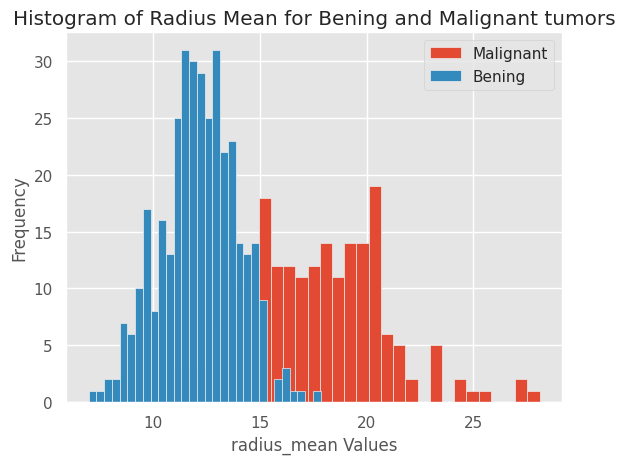

In [129]:
m = plt.hist(df[df['diagnosis']=="M"].radius_mean, bins=30,fc=(1,0,0,0.5),label="Malignant")
b = plt.hist(df[df['diagnosis']=='B'].radius_mean,bins=30,fc=(0,1,0,0.5),label='Bening')


plt.legend()
plt.xlabel("radius_mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant tumors")


plt.show()


**Outliers**

In [130]:
data_bening = df[df['diagnosis']=='B']
data_malignant = df[df['diagnosis']=='M']

desc = data_bening.radius_mean.describe()
desc

,radius_mean
count,357.000000
mean,12.146524
std,1.780512
min,6.981000
25%,11.080000
50%,12.200000
75%,13.370000
max,17.850000


In [131]:
Q1 = desc[4]
Q1

np.float64(11.08)

In [132]:
Q3 = desc[6]
Q3

np.float64(13.37)

In [133]:
IQR = Q3 - Q1
IQR

np.float64(2.289999999999999)

In [134]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound)
print(upper_bound)


7.645000000000001
16.805


In [135]:
data_bening[data_bening.radius_mean < lower_bound].radius_mean

,radius_mean
101,6.981


In [136]:

print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Outliers:  [ 6.981 16.84  17.85 ]


**Box plot**

In [137]:
malted_data = pd.melt(df, id_vars='diagnosis',value_vars=['radius_mean','texture_mean'])
malted_data

,diagnosis,variable,value
0,M,radius_mean,17.99
1,M,radius_mean,20.57
2,M,radius_mean,19.69
3,M,radius_mean,11.42
4,M,radius_mean,20.29
...,...,...,...
1133,M,texture_mean,22.39
1134,M,texture_mean,28.25
1135,M,texture_mean,28.08
1136,M,texture_mean,29.33


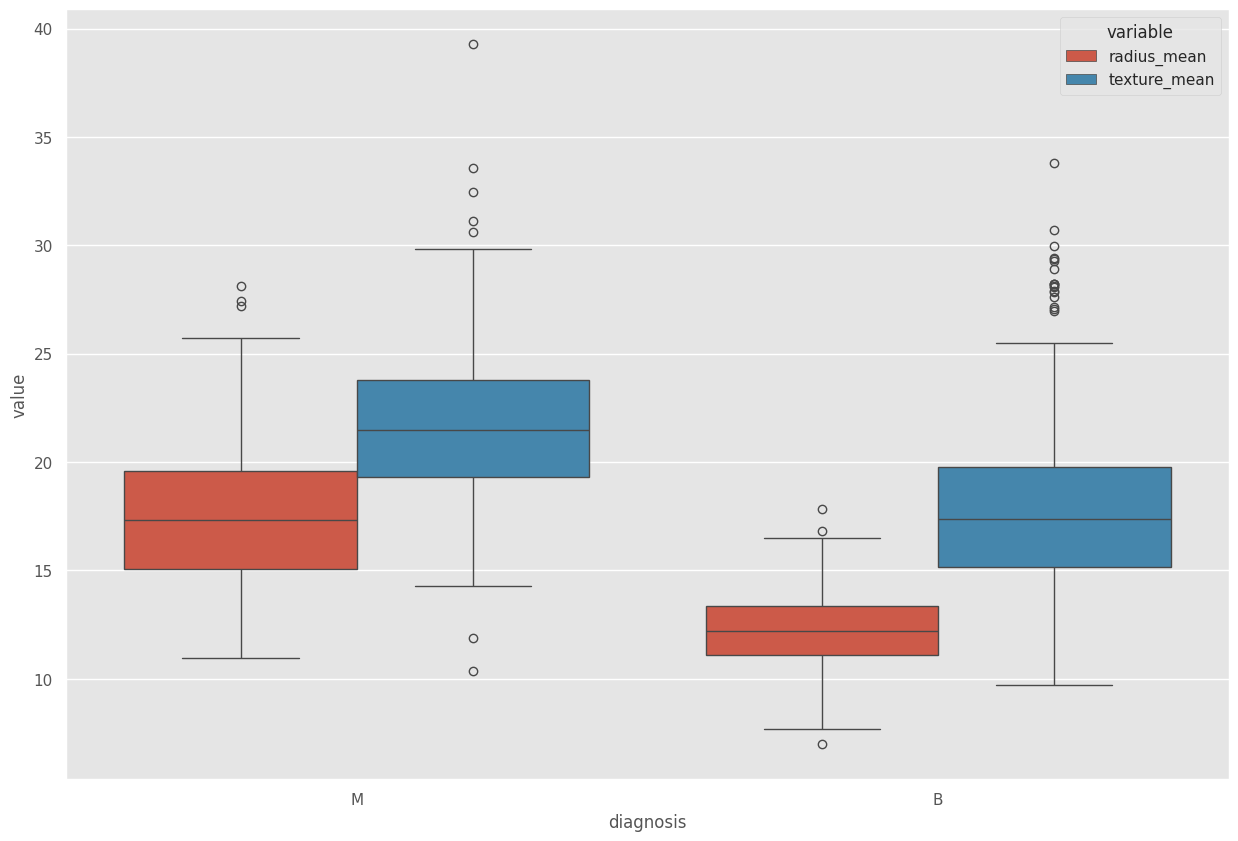

In [138]:
plt.figure(figsize=(15,10))
sns.boxplot(x='diagnosis',y='value',hue='variable',data=malted_data)
plt.show()

**Summary**

In [139]:
data_bening.radius_mean.mean()

np.float64(12.146523809523808)

In [140]:
data_bening['radius_mean'].mean()

np.float64(12.146523809523808)

In [141]:
#variance
data_bening.radius_mean.var()

3.170221722043872

In [142]:
#standard devision
data_bening.radius_mean.std()

1.7805116461410389

In [143]:
#describe method
data_bening.radius_mean.describe()

,radius_mean
count,357.000000
mean,12.146524
std,1.780512
min,6.981000
25%,11.080000
50%,12.200000
75%,13.370000
max,17.850000


**CDF (Cumulative Distribution function )**

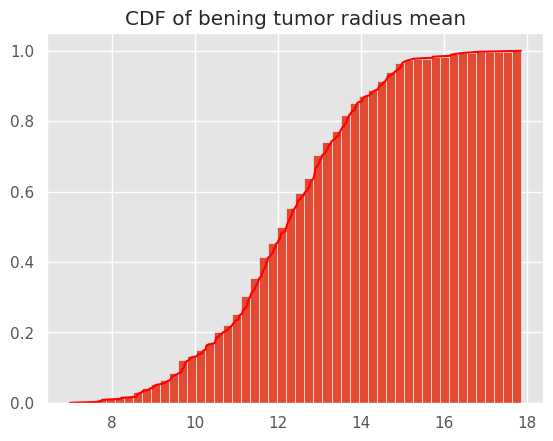

In [144]:
plt.hist(data_bening.radius_mean , bins=50, fc=(0,1,0,0.5),label='Bening',density=True, cumulative=True)

sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y, color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()


**Efect size**

In [145]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)


Effect size:  2.204858516504142


**Relationship Between Variable**

<Figure size 1500x1000 with 0 Axes>

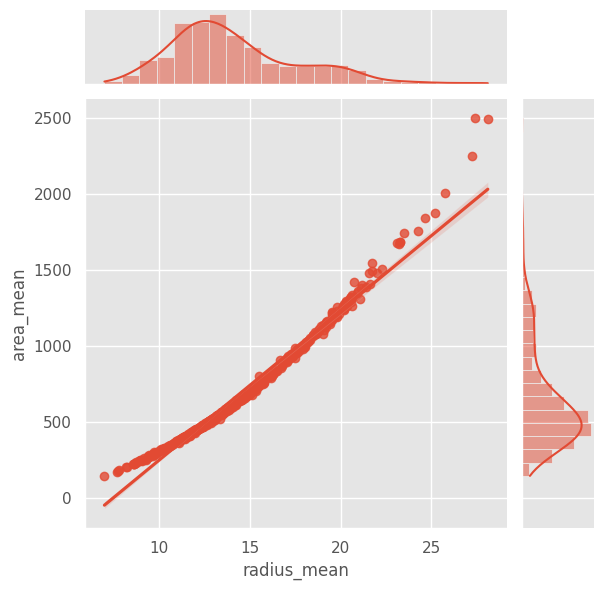

In [146]:
plt.figure(figsize=(15,10))
sns.jointplot(x=df.radius_mean, y=df.area_mean , kind='reg')
plt.show()

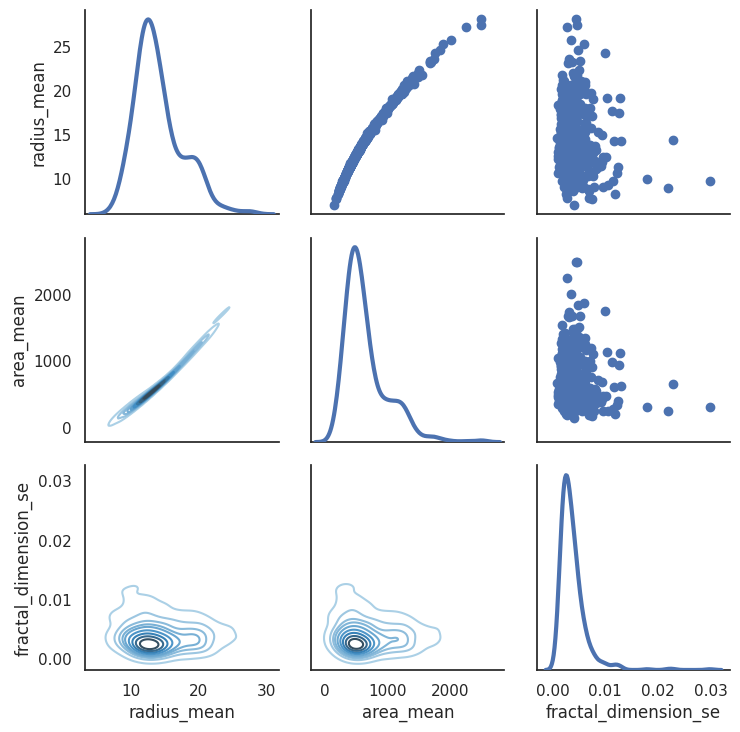

In [147]:
#also we can look relationship between more than 2 distribution
data = df
sns.set(style='white')
df = df.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

**correlation **

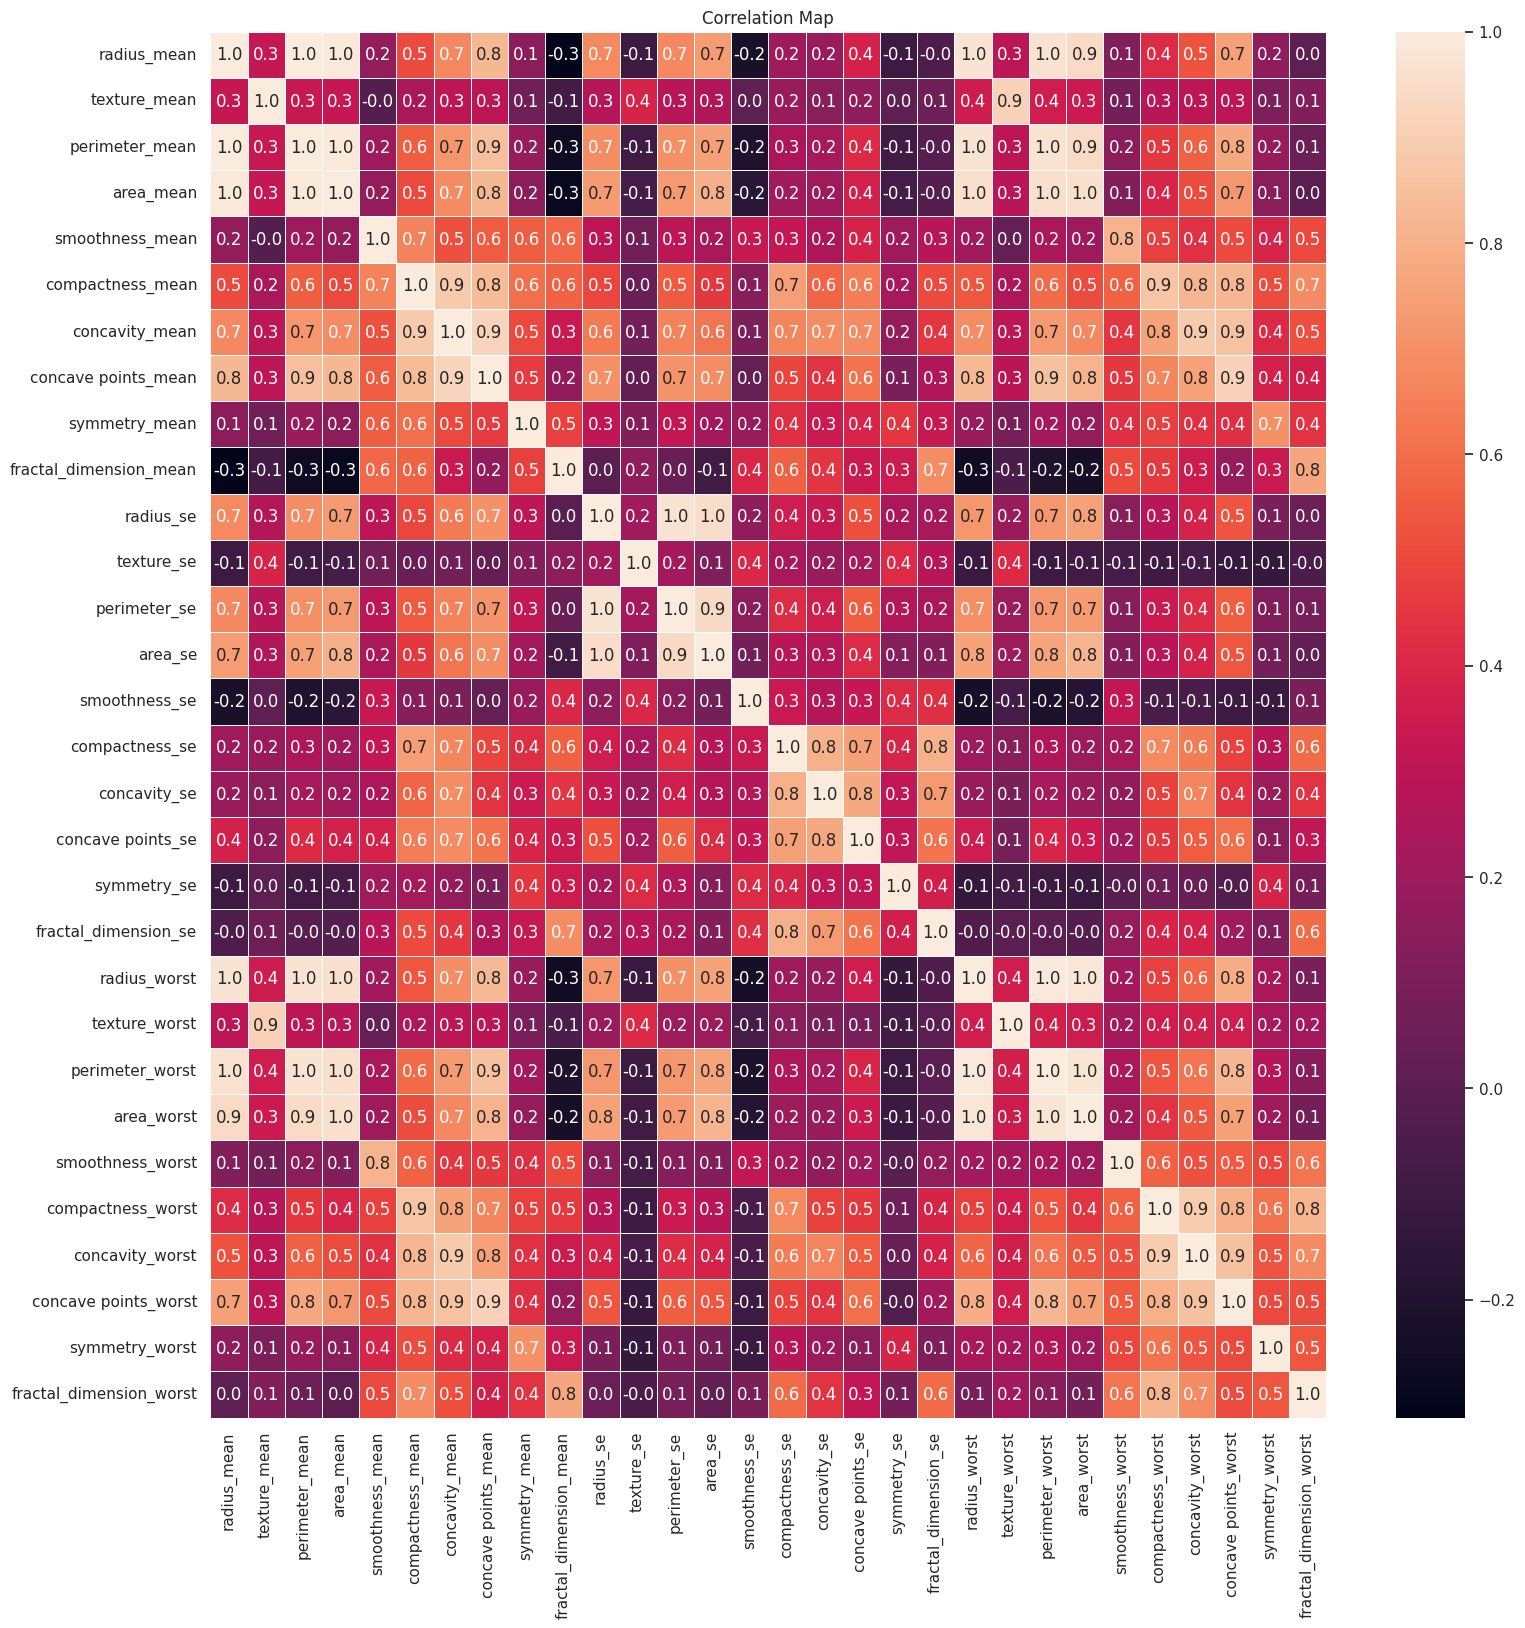

In [150]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df1.drop('diagnosis', axis=1).corr(), annot=True, linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.savefig('graph.png')
plt.show()

**Covariance**

In [151]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))


Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.0003976248576440629


**Pearson Correlation (r)**

In [155]:
p1 = df1.loc[:,['area_mean','radius_mean']].corr(method='pearson')
p1

,area_mean,radius_mean
area_mean,1.000000,0.987357
radius_mean,0.987357,1.000000


In [160]:
p2 = df1.radius_mean.cov(df1.area_mean)/(df1.radius_mean.std()*df1.area_mean.std())
p2

np.float64(0.9873571700566132)

**Spearman's Rank Correlation **

In [161]:
ranked_data = df1.rank()
ranked_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,463.5,476.5,2.0,492.0,478.0,538.0,564.0,554.0,553.5,554.0,...,538.0,45.0,552.5,542.0,513.0,557.0,551.0,561.0,555.0,539.0
1,463.5,540.0,223.0,528.5,544.0,125.0,222.0,343.0,421.0,306.0,...,532.0,224.0,514.5,537.0,207.0,232.0,299.0,476.0,254.0,399.0
2,463.5,519.0,396.5,517.5,516.0,478.0,489.5,507.5,543.0,477.5,...,511.0,295.0,504.0,516.0,416.0,503.0,468.0,545.0,514.5,384.0
3,463.5,118.0,364.0,173.0,100.0,567.0,566.0,538.0,519.0,564.0,...,281.0,337.0,295.0,203.0,567.0,565.0,542.0,557.0,569.0,568.0
4,463.5,532.0,64.0,539.0,537.0,357.5,441.0,510.0,517.5,302.0,...,492.0,30.0,500.5,493.0,338.5,271.0,443.0,428.5,90.5,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,463.5,552.0,453.0,550.0,553.0,489.0,381.0,541.0,549.0,236.0,...,539.0,331.0,532.0,544.0,376.0,281.0,452.0,529.0,23.0,139.0
565,463.5,526.0,554.0,524.0,529.0,316.0,322.0,444.0,508.0,256.0,...,513.0,553.0,508.0,518.0,143.0,241.0,374.0,430.0,173.5,66.0
566,463.5,446.0,549.0,442.0,447.0,120.0,318.0,351.0,358.0,118.0,...,429.0,519.0,430.0,432.0,123.5,405.0,391.0,378.0,43.0,257.0
567,463.5,543.0,558.0,547.0,532.0,536.0,563.0,563.0,559.0,550.5,...,544.0,559.0,552.5,528.0,525.0,566.0,565.0,560.0,542.0,547.0


In [162]:
spearman_corr = ranked_data.loc[:,['area_mean','radius_mean']].corr(method= 'pearson')
print("spearman's correlation : ")
print(spearman_corr)

spearman's correlation : 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


**Mean VS Median**

In [163]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


In [164]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


**Hypothesis Testing**

In [167]:
statistic , p_value = stats.ttest_rel(df1.radius_mean, df1.area_mean)
print("p_value: ",p_value)

p_value:  1.5253492492559045e-184


P values is almost zero so we can reject null hypothesis.

In [168]:
#parameters of normal distribution
mu, sigma = 110, 20 # mean and standard deviation

mu, sigma

(110, 20)

In [172]:
s = np.random.normal(mu, sigma,100000)
s.size


100000

In [173]:
np.mean(s)

np.float64(110.09362814165401)

In [174]:
np.std(s)

np.float64(20.057532593492187)

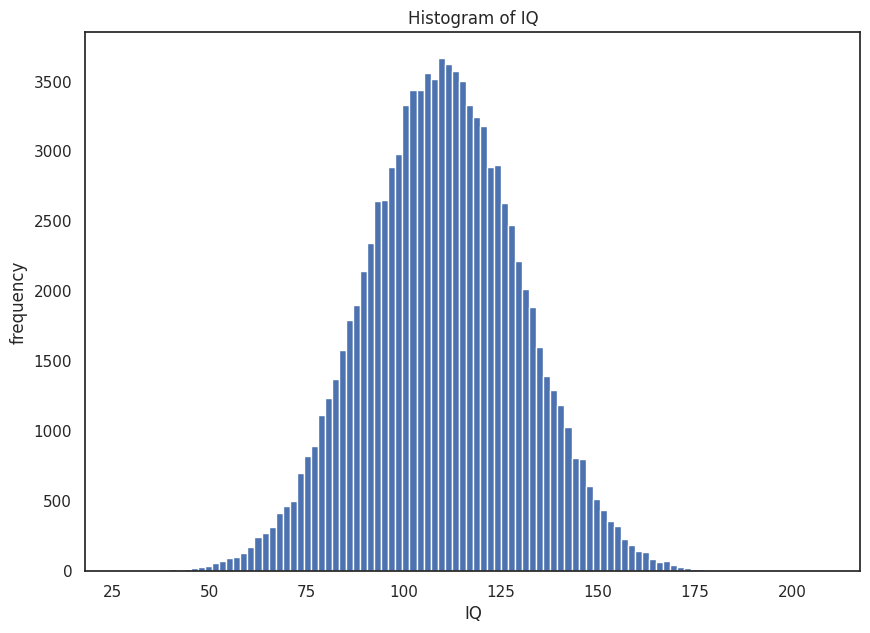

In [176]:
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, density=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()